<a href="https://colab.research.google.com/github/kunalnischal7/CustomerChurnPrediction/blob/main/InfosysSharePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Import Libraries

In [84]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Import Dataset from Google Drive

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


# Load Data

In [87]:
file_path = 'INFY.NS_stock_data.csv'

In [88]:
df = pd.read_csv(file_path)

In [89]:
df

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.524797,204800.0,INFY.NS
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.522674,204800.0,INFY.NS
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.526212,102400.0,INFY.NS
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.522738,307200.0,INFY.NS
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.516563,51200.0,INFY.NS
...,...,...,...,...,...,...,...,...
7119,2024-04-23,1443.000000,1446.849976,1433.000000,1442.400024,1442.400024,4856174.0,INFY.NS
7120,2024-04-24,1444.300049,1444.300049,1427.050049,1430.750000,1430.750000,4268213.0,INFY.NS
7121,2024-04-25,1420.000000,1444.900024,1420.000000,1438.449951,1438.449951,9089398.0,INFY.NS
7122,2024-04-26,1439.699951,1445.400024,1427.000000,1430.250000,1430.250000,8062444.0,INFY.NS


## Data Preparation

In [90]:
df.isnull().sum()

,0
Unnamed: 0,0
open,7
high,7
low,7
close,7
adjclose,7
volume,7
ticker,0


In [91]:
#Checking for outliers in the data
from scipy import stats

z_scores = stats.zscore(df['open'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_rows = df[outliers]
print("Outlier Rows:")
print(outlier_rows)

Outlier Rows:
Empty DataFrame
Columns: [Unnamed: 0, open, high, low, close, adjclose, volume, ticker]
Index: []


In [92]:
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True) #unnamed column -> date

In [93]:
df['Date'] = pd.to_datetime(df['Date']) #convert date to date time

In [94]:
df.set_index('Date', inplace=True) #date as index

In [95]:
df

,open,high,low,close,adjclose,volume,ticker
Date,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.524797,204800.0,INFY.NS
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.522674,204800.0,INFY.NS
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.526212,102400.0,INFY.NS
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.522738,307200.0,INFY.NS
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.516563,51200.0,INFY.NS
...,...,...,...,...,...,...,...
2024-04-23,1443.000000,1446.849976,1433.000000,1442.400024,1442.400024,4856174.0,INFY.NS
2024-04-24,1444.300049,1444.300049,1427.050049,1430.750000,1430.750000,4268213.0,INFY.NS
2024-04-25,1420.000000,1444.900024,1420.000000,1438.449951,1438.449951,9089398.0,INFY.NS


## Statistics

In [96]:
print(df.describe())

              open         high          low        close     adjclose  \
count  7117.000000  7117.000000  7117.000000  7117.000000  7117.000000   
mean    422.990009   427.578314   418.196353   422.880087   370.289713   
std     461.686483   465.735109   457.372830   461.550750   450.448686   
min       0.763183     0.765625     0.712890     0.763183     0.502732   
25%      79.218750    80.765625    77.814842    79.100784    54.102211   
50%     284.125000   287.424988   279.924988   284.237488   213.223022   
75%     545.724976   552.200012   538.500000   544.812500   448.366272   
max    1938.550049  1953.900024  1930.500000  1939.500000  1849.313232   

             volume  
count  7.117000e+03  
mean   1.451894e+07  
std    1.567648e+07  
min    0.000000e+00  
25%    5.688997e+06  
50%    8.926058e+06  
75%    1.701867e+07  
max    2.766150e+08  


In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7124 entries, 1996-01-01 to 2024-04-29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      7117 non-null   float64
 1   high      7117 non-null   float64
 2   low       7117 non-null   float64
 3   close     7117 non-null   float64
 4   adjclose  7117 non-null   float64
 5   volume    7117 non-null   float64
 6   ticker    7124 non-null   object 
dtypes: float64(6), object(1)
memory usage: 445.2+ KB
None


# Visualising Data

In [98]:
import matplotlib.pyplot as plt

In [99]:
df['MA7'] = df['close'].rolling(window=7).mean()

In [100]:
df['MA30'] = df['close'].rolling(window=30).mean()

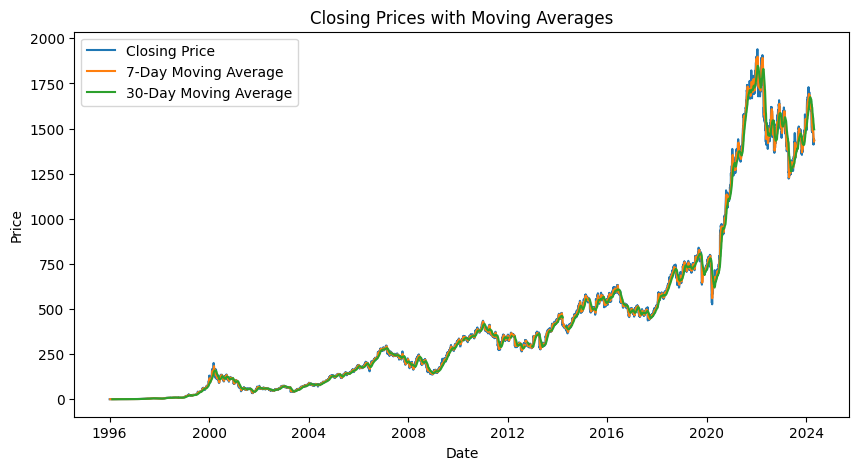

In [101]:
plt.figure(figsize=(10, 5))  # Create a figure of size 10x5 inches
plt.plot(df['close'], label='Closing Price')  # Plot the 'close' column
plt.plot(df['MA7'], label='7-Day Moving Average')  # Plot the 7-day moving average
plt.plot(df['MA30'], label='30-Day Moving Average')  # Plot the 30-day moving average
plt.title('Closing Prices with Moving Averages')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Price')  # Label the y-axis
plt.legend()  # Add a legend to differentiate lines
plt.show()  # Display the plot

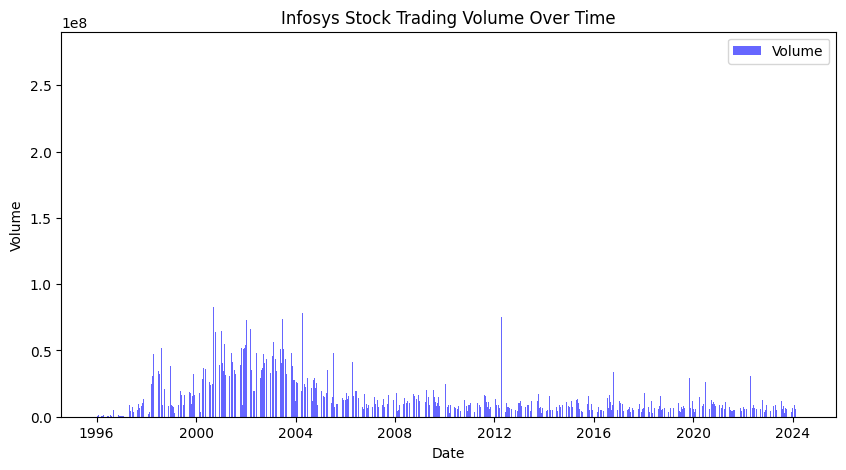

In [102]:
plt.figure(figsize=(10, 5))  # Create a new figure
plt.bar(df.index, df['volume'], color='blue', alpha=0.6, label='Volume')  # Create a bar chart for volume
plt.title('Infosys Stock Trading Volume Over Time')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Volume')  # Label the y-axis
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [104]:
X = df[['MA7', 'MA30']]  # Features (Moving Averages)
y = df['close']  # Target variable

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
print(X_train.isnull().sum())  # Count missing values in each column

MA7      46
MA30    200
dtype: int64


In [107]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure corresponding labels are not dropped

In [108]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or other strategies if preferred
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [109]:
print(pd.DataFrame(X_train).isnull().sum())  # Should return zero for all columns

0    0
1    0
dtype: int64


In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)

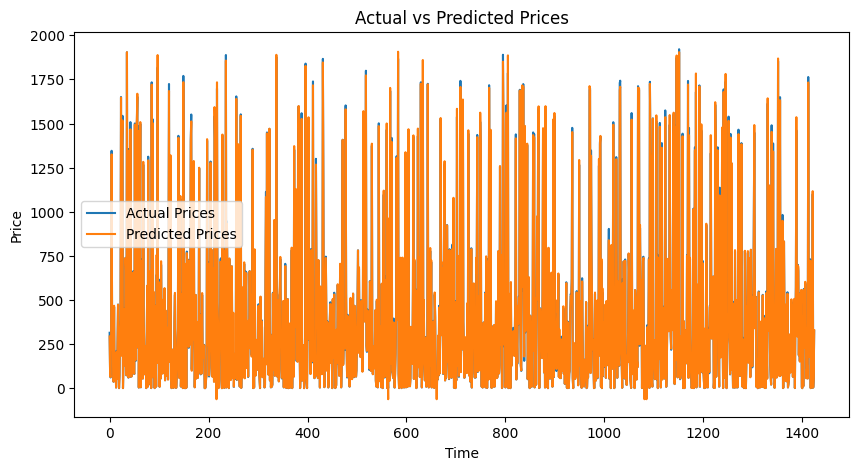

In [112]:
plt.figure(figsize=(10, 5))  # Create a new figure
plt.plot(y_test.values, label='Actual Prices')  # Plot the actual prices
plt.plot(y_pred, label='Predicted Prices')  # Plot the predicted prices
plt.title('Actual vs Predicted Prices')  # Add a title
plt.xlabel('Time')  # Label the x-axis
plt.ylabel('Price')  # Label the y-axis
plt.legend()  # Add a legend to differentiate lines
plt.show()  # Display the plot

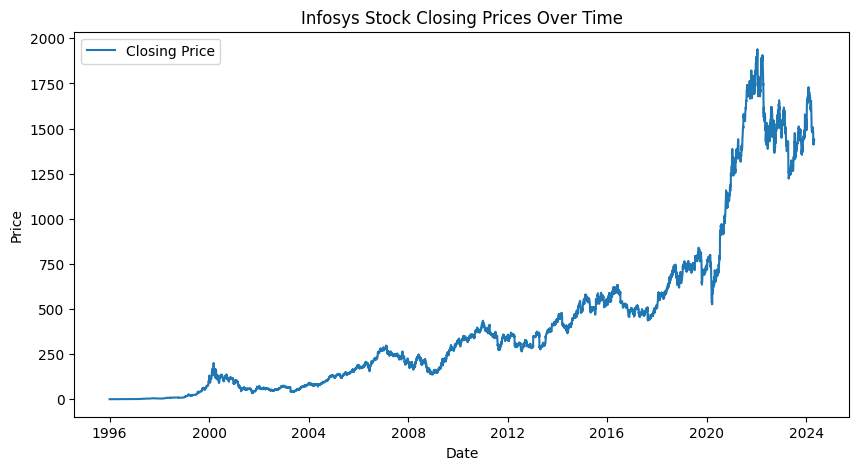

In [113]:
plt.figure(figsize=(10, 5))  # Create a figure of size 10x5 inches
plt.plot(df['close'], label='Closing Price')  # Plot the 'close' column with a label
plt.title('Infosys Stock Closing Prices Over Time')  # Add a title to the chart
plt.xlabel('Date')  # Label the x-axis as 'Date'
plt.ylabel('Price')  # Label the y-axis as 'Price'
plt.legend()  # Add a legend to the plot (e.g., "Closing Price")
plt.show()  # Display the plot

# News

In [114]:
import requests

API_KEY = "af2d4ccd7c214d28b519209ec6869ffa"  # Replace with your valid API key
query = "Infosys"
url = f"https://newsapi.org/v2/everything?q={query}&apiKey={API_KEY}"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise HTTPError for bad responses
    news_data = response.json()

    if 'articles' in news_data:
        for article in news_data['articles'][:10]:  # Display up to 10 articles
            print(f"Title: {article.get('title', 'No Title')}")
            print(f"Description: {article.get('description', 'No Description')}")
            print(f"URL: {article.get('url', 'No URL')}\n")
    else:
        print("No articles found in the response.")

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")  # HTTP-specific error
except requests.exceptions.RequestException as req_err:
    print(f"Request error occurred: {req_err}")  # General request error

Title: Business leaders share 5 ways they're taking AI from pilot to use case
Description: Leaders from Mastercard, Infosys, IBM, and more share how they created AI use cases at their companies.
URL: https://www.businessinsider.com/business-leaders-share-how-they-integrated-ai-company-pilot-use-2024-12

Title: Infosys Founder Calls For 70-Hour Work Week, Again
Description: Infosys co-founder Narayana Murthy has once again argued for Indian workers to spend 70 hours a week in paid employment. From a report: Murthy called for the long working hours in October 2023 and then again in January 2024, and recently shared his opinion th…
URL: https://slashdot.org/story/24/12/16/2253203/infosys-founder-calls-for-70-hour-work-week-again

Title: I was born in the 'Silicon Valley' of India and watched it change from a quiet, green city to an international tech hub
Description: Vikram Chandrashekar was born in Bengaluru, the city dubbed India's "Silicon Valley." The veteran Oracle employee shared ho

In [115]:
symbol = "INFY"

In [116]:
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}.NS&apikey={API_KEY}"
response = requests.get(url)
data = response.json()

In [117]:
import requests

In [118]:
if 'Time Series (Daily)' in data:
    time_series = data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(time_series, orient='index').T
    df = df.astype(float)  # Convert columns to numeric type
    print(df.head())
else:
    print("Error: Could not retrieve data. Here is the response:")
    print(data)

Error: Could not retrieve data. Here is the response:
{}


In [119]:
import yfinance as yf

In [120]:
symbol = "INFY.NS"

In [121]:
data = yf.download(symbol, start="2010-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [122]:
print(data.head())

Price        Adj Close       Close        High         Low        Open  \
Ticker         INFY.NS     INFY.NS     INFY.NS     INFY.NS     INFY.NS   
Date                                                                     
2010-01-04  236.756866  326.575012  328.750000  324.412506  326.250000   
2010-01-05  237.549805  327.668762  328.837494  325.012512  327.500000   
2010-01-06  234.083466  322.887512  335.375000  321.887512  335.375000   
2010-01-07  228.822876  315.631256  323.325012  314.774994  323.325012   
2010-01-08  223.308624  308.024994  315.412506  307.250000  314.875000   

Price         Volume  
Ticker       INFY.NS  
Date                  
2010-01-04   4069264  
2010-01-05   6895528  
2010-01-06   6817288  
2010-01-07  10892600  
2010-01-08  12649312  


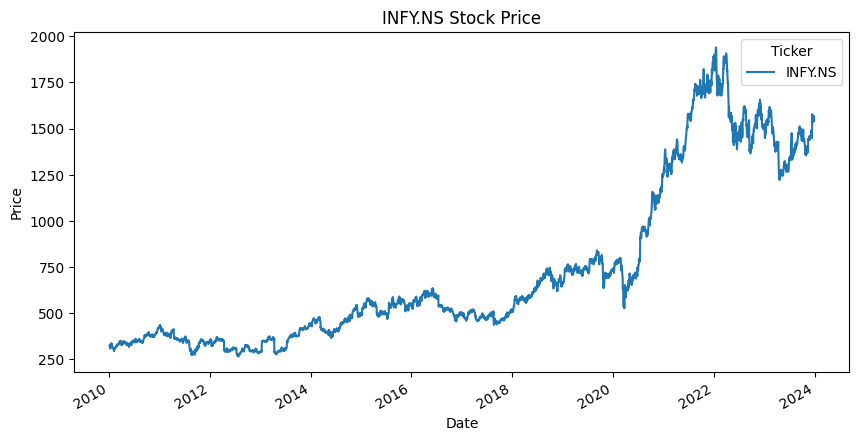

In [123]:
import matplotlib.pyplot as plt
data['Close'].plot(figsize=(10, 5), title=f"{symbol} Stock Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [124]:
!pip install quandl

In [125]:
import quandl

In [126]:
stock = yf.Ticker('INFY.NS')
data = stock.history(period='1mo')  # Adjust the period as needed
print(data)

                                  Open         High          Low        Close  \
Date                                                                            
2024-11-27 00:00:00+05:30  1930.099976  1941.400024  1911.750000  1924.500000   
2024-11-28 00:00:00+05:30  1914.900024  1914.900024  1851.650024  1856.650024   
2024-11-29 00:00:00+05:30  1851.099976  1877.000000  1845.000000  1857.849976   
2024-12-02 00:00:00+05:30  1859.000000  1882.800049  1835.199951  1879.800049   
2024-12-03 00:00:00+05:30  1887.000000  1899.750000  1871.150024  1892.099976   
2024-12-04 00:00:00+05:30  1884.000000  1913.949951  1875.000000  1889.250000   
2024-12-05 00:00:00+05:30  1900.000000  1949.900024  1888.949951  1934.849976   
2024-12-06 00:00:00+05:30  1932.800049  1937.949951  1912.400024  1922.400024   
2024-12-09 00:00:00+05:30  1924.199951  1930.199951  1897.199951  1923.650024   
2024-12-10 00:00:00+05:30  1939.000000  1965.599976  1932.000000  1948.550049   
2024-12-11 00:00:00+05:30  1

In [127]:
print(f"NaN values in y_test: {y_test.isna().sum()}")
print(f"NaN values in y_pred: {pd.isna(y_pred).sum()}")

NaN values in y_test: 2
NaN values in y_pred: 0


In [128]:
y_test_clean = y_test.dropna()  # Removes NaN values from y_test
y_pred_clean = y_pred[~pd.isna(y_pred)]  # Removes NaN values from y_pred

In [129]:
print(f"NaN values in y_test: {y_test.isna().sum()}")
print(f"NaN values in y_pred: {pd.isna(y_pred).sum()}")

NaN values in y_test: 2
NaN values in y_pred: 0


In [130]:
# Explicitly reassign the cleaned y_test back after dropping NaNs
y_test_clean = y_test.dropna()

# Verify again
print(f"NaN values in y_test_clean: {y_test_clean.isna().sum()}")

NaN values in y_test_clean: 0


In [131]:
print(y_test.head())  # Inspect the structure

Date
2010-02-17     314.831238
2003-10-17      73.986717
2001-12-26      61.781250
2012-10-08     311.024994
2021-03-09    1345.550049
Name: close, dtype: float64


In [132]:
# Truncate y_pred to match the length of y_test_clean
y_pred_truncated = y_pred[:len(y_test_clean)]

# Convert y_pred_truncated to a Pandas Series with the same index as y_test_clean
y_pred_series = pd.Series(y_pred_truncated, index=y_test_clean.index)

# Calculate the mean squared error
mse = mean_squared_error(y_test_clean, y_pred_series)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 346248.3542559882


In [133]:
df

,open,high,low,close,adjclose,volume,ticker,MA7,MA30
Date,,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.524797,204800.0,INFY.NS,NaN,NaN
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.522674,204800.0,INFY.NS,NaN,NaN
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.526212,102400.0,INFY.NS,NaN,NaN
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.522738,307200.0,INFY.NS,NaN,NaN
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.516563,51200.0,INFY.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-23,1443.000000,1446.849976,1433.000000,1442.400024,1442.400024,4856174.0,INFY.NS,1439.000000,1519.316659
2024-04-24,1444.300049,1444.300049,1427.050049,1430.750000,1430.750000,4268213.0,INFY.NS,1431.285714,1513.089990
2024-04-25,1420.000000,1444.900024,1420.000000,1438.449951,1438.449951,9089398.0,INFY.NS,1427.042847,1507.156657


In [134]:
# Drop rows with NaN in any relevant column
df_cleaned = df[['open', 'high', 'low', 'volume', 'MA7', 'MA30', 'close']].dropna()

# Features and target
features = df_cleaned[['open', 'high', 'low', 'volume', 'MA7', 'MA30', 'close']].values
target = df_cleaned['close'].values

# Normalize target
scaler = MinMaxScaler()
target_scaled = scaler.fit_transform(target.reshape(-1, 1)).flatten()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target_scaled, test_size=0.2, random_state=42)

# Train Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 1.0540078866570253
Root Mean Squared Error: 1.0266488623950378
Mean Absolute Error: 0.2947370478006563


## Feature Importance

In [135]:
importances = model.feature_importances_
feature_names = ['open', 'high', 'low', 'volume', 'MA7', 'MA30']
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.2f}")


open: 0.19
high: 0.23
low: 0.17
volume: 0.00
MA7: 0.06
MA30: 0.00


## Hyperparameter tuning

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

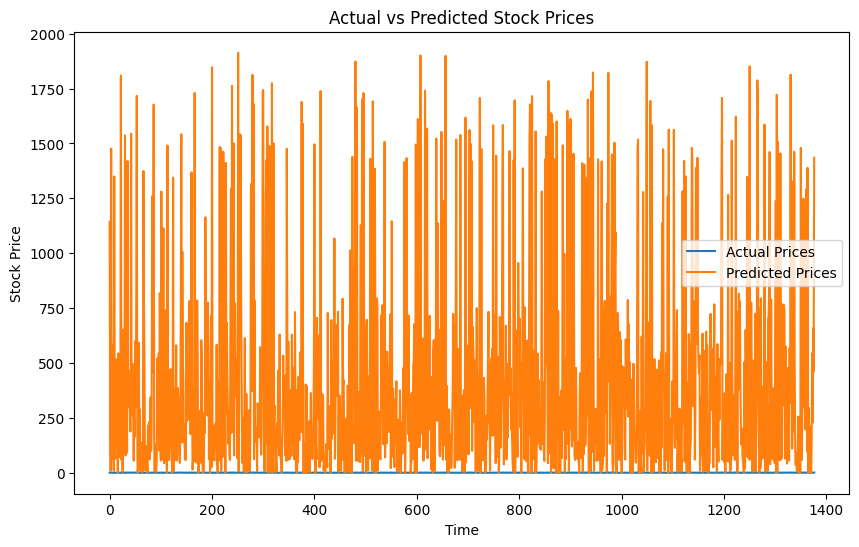

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

# Future Predictions

In [138]:
future_features = np.array([
    [0.19, 0.23, 0.17, 0.00, 0.06, 0.00]  # Replace with your actual values
])

# Ensure it matches the format used for training
print(future_features.shape)

(1, 6)


In [139]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)  # Use all 7 features

In [140]:
print(future_features.shape)  # Should output (1, 7)

(1, 6)


In [141]:
print(scaler.n_features_in_)  # Number of features the scaler was fitted on

7


In [142]:
# Separate scaler for the close price
close_scaler = MinMaxScaler()

# Fit the scaler only on the 'close' column
target_scaled = close_scaler.fit_transform(df[['close']])

In [143]:
# Assuming 'df' is your DataFrame with stock data
last_row = df.iloc[-1]

# Include the 'close' feature in future_features
future_features = np.array([[last_row['open'], last_row['high'], last_row['low'],
                              last_row['volume'], last_row['MA7'], last_row['MA30'], last_row['close']]])

# Scale the features
future_features_scaled = scaler.transform(future_features)

# Predict scaled 'close' value
scaled_prediction = model.predict(future_features_scaled)

# Inverse transform the scaled prediction
original_prediction = scaler.inverse_transform(
    np.hstack([future_features_scaled[0, :-1], scaled_prediction.reshape(-1)]).reshape(1, -1)
)

# Extract the predicted 'close' price
predicted_close = original_prediction[0, -1]
print(f"Predicted Close Price: {predicted_close}")

Predicted Close Price: 0.9177816659212111


In [144]:
# Convert numpy array to DataFrame, assuming the columns are the same as in the original data
future_features = pd.DataFrame(future_features, columns=['open', 'high', 'low', 'volume', 'MA7', 'MA30', 'extra_column'])

# Now you can slice using .iloc
future_features = future_features.iloc[:, :6]  # Keep only the first 6 features

In [145]:
# Ensure you are selecting the correct 7 columns by name (matching the training columns)
future_features = future_features.iloc[:, :7]  # Use iloc to slice the first 7 columns

In [146]:
if isinstance(future_features, pd.DataFrame):
    future_features = future_features.iloc[:, :7]  # If it's a DataFrame, slice with .iloc

In [148]:
# Ensure last_row is a copy, not a view
last_row = df.iloc[-1].copy()

# Predict for multiple days
num_days = 5
predictions = []

for _ in range(num_days):
    # Prepare features for prediction
    future_features = np.array([[last_row['open'], last_row['high'], last_row['low'],
                                  last_row['volume'], last_row['MA7'], last_row['MA30'], last_row['close']]])
    future_features_scaled = scaler.transform(future_features)

    # Predict and inverse scale
    scaled_prediction = model.predict(future_features_scaled)
    original_prediction = scaler.inverse_transform(
        np.hstack([future_features_scaled[0, :-1], scaled_prediction.reshape(-1)]).reshape(1, -1)
    )
    predicted_close = original_prediction[0, -1]
    predictions.append(predicted_close)

    # Update last_row for the next prediction
    last_row['close'] = predicted_close
    last_row['MA7'] = (last_row['MA7'] * 6 + predicted_close) / 7  # Update moving average
    last_row['MA30'] = (last_row['MA30'] * 29 + predicted_close) / 30

print(f"Predicted Close Prices for {num_days} days: {predictions}")

Predicted Close Prices for 5 days: [0.9177816659212111, 0.9180004161596298, 0.9180004161596298, 0.9180004161596298, 0.9180004161596298]


In [149]:
df

,open,high,low,close,adjclose,volume,ticker,MA7,MA30
Date,,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.524797,204800.0,INFY.NS,NaN,NaN
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.522674,204800.0,INFY.NS,NaN,NaN
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.526212,102400.0,INFY.NS,NaN,NaN
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.522738,307200.0,INFY.NS,NaN,NaN
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.516563,51200.0,INFY.NS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-23,1443.000000,1446.849976,1433.000000,1442.400024,1442.400024,4856174.0,INFY.NS,1439.000000,1519.316659
2024-04-24,1444.300049,1444.300049,1427.050049,1430.750000,1430.750000,4268213.0,INFY.NS,1431.285714,1513.089990
2024-04-25,1420.000000,1444.900024,1420.000000,1438.449951,1438.449951,9089398.0,INFY.NS,1427.042847,1507.156657


In [150]:
df['MA7'] = df['MA7'].fillna(df['MA7'].mean())  # Filling with mean, or you can use forward fill df['MA7'].fillna(method='ffill')
df['MA30'] = df['MA30'].fillna(df['MA30'].mean())  # Same for MA30

In [151]:
features = df[['open', 'high', 'low', 'volume', 'MA7', 'MA30']]
target = df['close'].values.reshape(-1, 1)  # Reshape for the model

In [152]:
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(features)

In [153]:
column_names = ['open', 'high', 'low', 'volume', 'MA7', 'MA30', 'close']

In [154]:
future_features = future_features[:, :6]

In [155]:
column_names = ['open', 'high', 'low', 'volume', 'MA7', 'MA30']  # Ensure it matches the data
future_features_df = pd.DataFrame(future_features, columns=column_names)

In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Assuming `df` is your DataFrame containing the data

# 1. Handle missing values in the target (close column)
df_cleaned = df.dropna(subset=['close'])  # Drop rows with NaN in target column

# 2. Prepare features and target variable
features = df_cleaned[['open', 'high', 'low', 'volume', 'MA7', 'MA30']]  # Features
target = df_cleaned['close'].values.reshape(-1)  # Flatten target to 1D

# 3. Initialize the MinMaxScaler and scale the features
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(features)

# 4. Train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(scaled_features, target)

# 5. Prepare future features (ensure they have 7 columns)
# Assuming `future_features` is the new data you want to predict on
required_columns = ['open', 'high', 'low', 'volume', 'MA7', 'MA30']

# If `future_features` is a DataFrame, ensure it has the required columns
if isinstance(future_features, pd.DataFrame):
    missing_columns = set(required_columns) - set(future_features.columns)
    for column in missing_columns:
        future_features[column] = np.nan  # Add missing columns with NaN or handle differently
    # Ensure it has exactly 6 features (or 7 if you want extra)
    future_features = future_features[required_columns]

# If `future_features` is a NumPy array, ensure it has 7 columns
elif isinstance(future_features, np.ndarray):
    if future_features.shape[1] < 6:
        raise ValueError(f"future_features must have 7 columns, but it has only {future_features.shape[1]}")
    future_features = future_features[:, :6]  # Keep only the first 7 columns

# 6. Scale the future features using the same scaler
scaled_future_features = feature_scaler.transform(future_features)

# 7. Predict using the trained model
scaled_predictions = model.predict(scaled_future_features)

# 8. Optionally, reshape predictions if needed
scaled_predictions = scaled_predictions.reshape(-1, 1)

# Print or return the predictions
print(scaled_predictions)

[[1367.91849854]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [157]:
predicted_value = scaled_predictions[0][0]
print(predicted_value)

1367.9184985351562


In [158]:
# Assuming you used a MinMaxScaler for target variable scaling
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.reshape(-1, 1))

# Now inverse transform the scaled prediction
predicted_value_original_scale = target_scaler.inverse_transform(scaled_predictions)
print(predicted_value_original_scale)

[[2652034.71895161]]


In [159]:
# Assuming target_scaler was used to scale the target variable (close prices)
predicted_value_original_scale = target_scaler.inverse_transform(scaled_predictions)

# Print the prediction in original scale
print(predicted_value_original_scale)

[[2652034.71895161]]
